Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   vm_id                      890 non-null    object 
 1   timestamp                  917 non-null    object 
 2   cpu_usage                  909 non-null    float64
 3   memory_usage               895 non-null    float64
 4   network_traffic            891 non-null    float64
 5   power_consumption          888 non-null    float64
 6   num_executed_instructions  898 non-null    float64
 7   execution_time             880 non-null    float64
 8   energy_efficiency          900 non-null    float64
 9   task_type                  908 non-null    object 
 10  task_priority              898 non-null    object 
 11  task_status                896 non-null    object 
dtypes: float64(7), object(5)
memory usage: 93.8+ KB

Preview of Dataset:
                

c:\Users\Vaishnavi Mohite\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training the LSTM model...
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.1514 - val_loss: 0.1066
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0940 - val_loss: 0.0858
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0879 - val_loss: 0.0845
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0870 - val_loss: 0.0842
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0868 - val_loss: 0.0841
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0847 - val_loss: 0.0841
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0875 - val_loss: 0.0840
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0836 - val_loss: 0.0840
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0866 - val_loss: 0.0864
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0822 - val_loss: 0.0845
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0856 - val_loss: 0.0859
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━

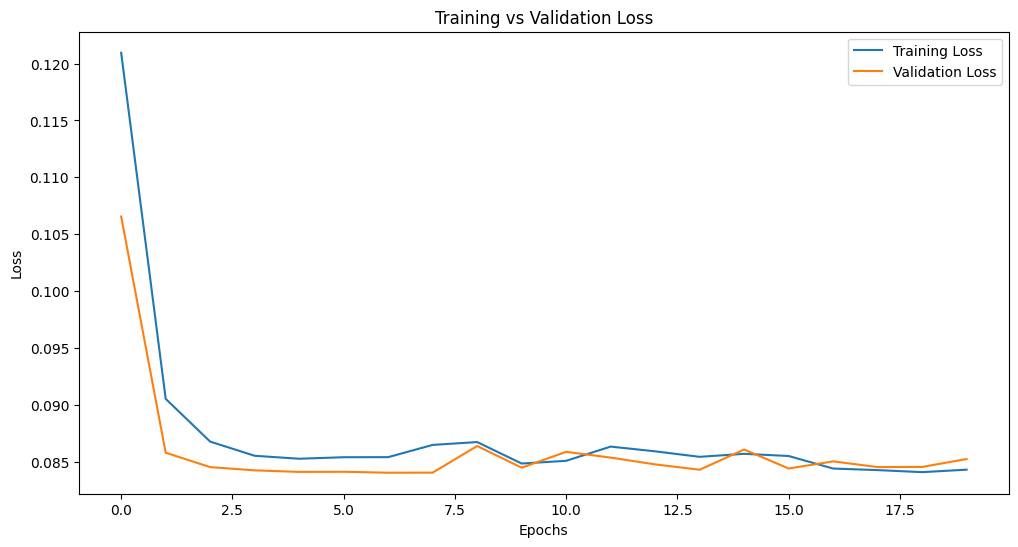

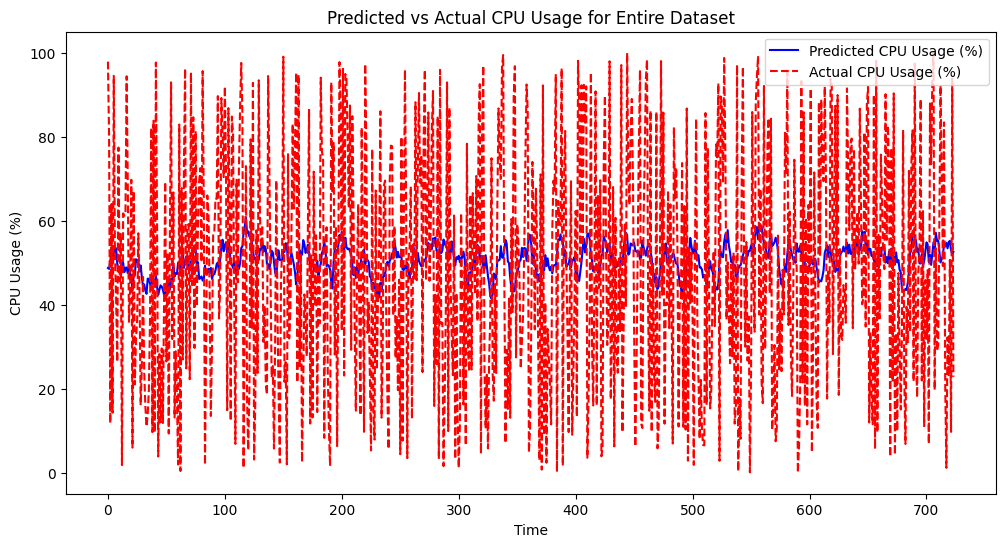

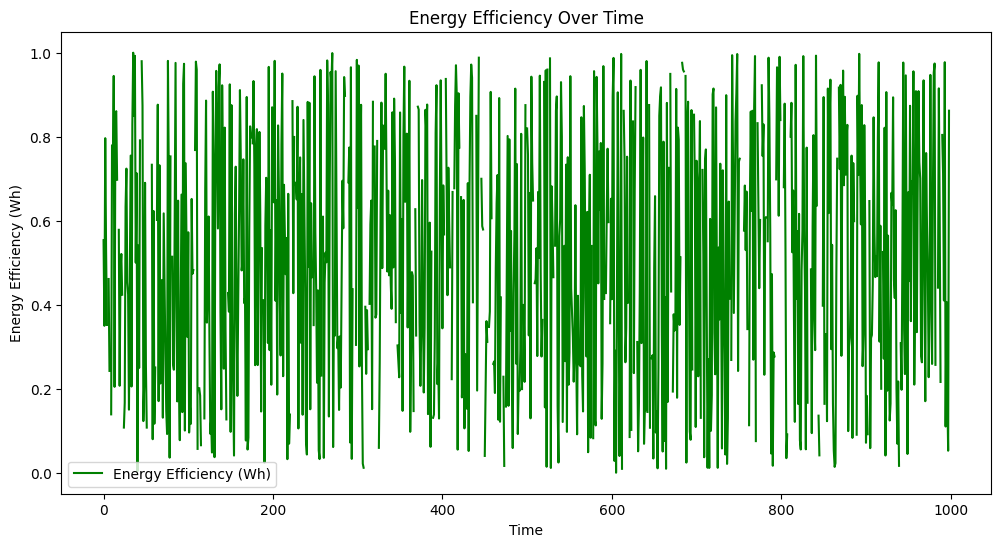


Predictions saved to: C:\Users\Vaishnavi Mohite\Downloads\predictions_with_units_updated.xlsx

Test Case 1:

Test Case 2:


c:\Users\Vaishnavi Mohite\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step

Test Case 1:
Predicted CPU Usage: 8.35%
Resource Allocation Decision: Scale Down

Test Case 2:
Predicted CPU Usage: 7.58%
Resource Allocation Decision: Scale Down


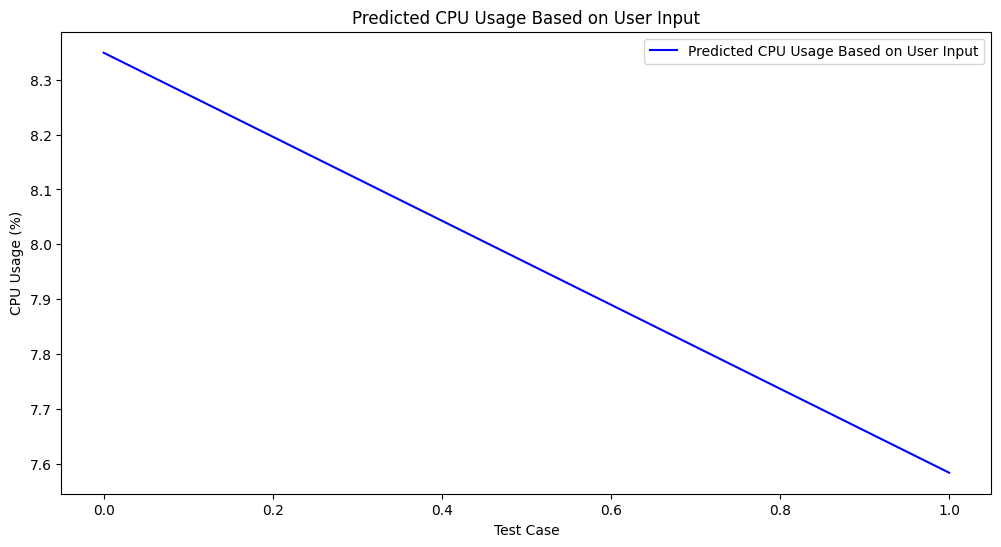


User test case predictions saved to: C:\Users\Vaishnavi Mohite\Downloads\user_input_predictions.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = r'C:\Users\Vaishnavi Mohite\Downloads\ML MODEL ON\vmCloud_data.csv'
data = pd.read_csv(file_path)

# Check for missing values and basic information
print("Dataset Information:")
data.info()

# Display the first few rows of the dataset
print("\nPreview of Dataset:")
print(data.head())

# Select relevant features and handle missing values
data_clean = data[['cpu_usage', 'memory_usage', 'energy_efficiency']].dropna()

# Normalize the data (between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_clean)

# Convert data into time-series format
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step, 0])  # Predicting CPU usage
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Split data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(time_step, X.shape[2])))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
print("Training the LSTM model...")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))  # Directly calculate MAE
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("\nModel Evaluation Metrics:")
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2:.2f}')

# Dynamic Resource Allocation Logic
def allocate_resources(predicted_usage, current_usage, threshold=0.8):
    if predicted_usage > threshold * current_usage:
        return 'Scale Up'
    elif predicted_usage < 0.5 * current_usage:
        return 'Scale Down'
    else:
        return 'Maintain'

# Predict for the entire dataset
all_predictions = model.predict(X)

# Reverse scale predictions for CPU usage only (first column of predictions)
scaled_predictions_cpu = all_predictions.flatten()

# Reverse the scaling for CPU predictions (from [0,1] to the original range)
scaled_predictions_cpu = scaler.inverse_transform(np.column_stack((scaled_predictions_cpu, np.zeros_like(scaled_predictions_cpu), np.zeros_like(scaled_predictions_cpu))))[:, 0]

# Ensure the predicted CPU values are within 0-100%
scaled_predictions_cpu = np.clip(scaled_predictions_cpu, 0, 100)

# Simulate decisions for the entire dataset
allocations = [allocate_resources(pred, curr) for pred, curr in zip(scaled_predictions_cpu, y)]

# Save the predictions to Excel
predictions_df = pd.DataFrame({
    'Actual CPU Usage (%)': y * 100,  # CPU usage as percentage
    'Predicted CPU Usage (%)': scaled_predictions_cpu,  # CPU usage as percentage
    'Actual Memory Usage (MB)': data['memory_usage'][:len(y)],  # Memory usage in MB
    'Energy Efficiency (Wh)': data['energy_efficiency'][:len(y)],  # Energy Efficiency in Wh
    'Allocation Decision': allocations
})

output_file_path = r'C:\Users\Vaishnavi Mohite\Downloads\predictions_with_units_updated.xlsx'
predictions_df.to_excel(output_file_path, index=False)

# Print dynamic resource allocation decisions for the entire dataset
print("\nDynamic Resource Allocation Decisions for Entire Dataset:")
for i, alloc in enumerate(allocations):
    print(f"Test Case {i + 1}: {alloc} (Predicted CPU Usage: {scaled_predictions_cpu[i]:.2f}% / Energy Efficiency: {data['energy_efficiency'].iloc[i]:.2f} Wh)")

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot predicted vs actual CPU usage
plt.figure(figsize=(12, 6))
plt.plot(scaled_predictions_cpu, label='Predicted CPU Usage (%)', color='blue')
plt.plot(y * 100, label='Actual CPU Usage (%)', color='red', linestyle='dashed')
plt.title("Predicted vs Actual CPU Usage for Entire Dataset")
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.show()

# Plot energy efficiency over time
plt.figure(figsize=(12, 6))
plt.plot(data['energy_efficiency'], label='Energy Efficiency (Wh)', color='green')
plt.title("Energy Efficiency Over Time")
plt.xlabel('Time')
plt.ylabel('Energy Efficiency (Wh)')
plt.legend()
plt.show()

# Confirm the Excel file creation
print(f"\nPredictions saved to: {output_file_path}")

# Add user input for CPU usage, memory usage, and energy efficiency
def user_input():
    # Ask user for number of test cases
    num_test_cases = int(input("\nEnter the number of test cases you want to input: "))
    
    test_cases = []
    for i in range(num_test_cases):
        print(f"\nTest Case {i + 1}:")
        cpu_usage = float(input("Enter the CPU usage (0-100): "))
        memory_usage = float(input("Enter the Memory usage (in MB): "))
        energy_efficiency = float(input("Enter the Energy Efficiency (in Wh): "))
        
        test_cases.append([cpu_usage, memory_usage, energy_efficiency])
    
    return np.array(test_cases)

# Get user input
user_test_cases = user_input()

# Normalize user input data
scaled_user_data = scaler.transform(user_test_cases)

# Ensure that the input for time_step is correctly shaped
# We need to reshape the data into the correct format for the LSTM model, which expects (samples, time steps, features)
user_input_time_step = scaled_user_data.reshape((scaled_user_data.shape[0], 1, scaled_user_data.shape[1]))

# Predict CPU usage based on user input
user_predicted_cpu = model.predict(user_input_time_step)

# Reverse scale prediction
scaled_user_predicted_cpu = scaler.inverse_transform(np.column_stack((user_predicted_cpu.flatten(), np.zeros_like(user_predicted_cpu.flatten()), np.zeros_like(user_predicted_cpu.flatten()))))[:, 0]

# Ensure the predicted CPU value is within 0-100%
scaled_user_predicted_cpu = np.clip(scaled_user_predicted_cpu, 0, 100)

# Resource allocation decision for each test case
allocation_decisions = [
    allocate_resources(predicted, cpu)
    for predicted, cpu in zip(scaled_user_predicted_cpu, user_test_cases[:, 0])
]

# Create a DataFrame to save the user input results
user_predictions_df = pd.DataFrame({
    'Input CPU Usage (%)': user_test_cases[:, 0],  # Input CPU usage
    'Input Memory Usage (MB)': user_test_cases[:, 1],  # Input Memory usage
    'Input Energy Efficiency (Wh)': user_test_cases[:, 2],  # Input Energy Efficiency
    'Predicted CPU Usage (%)': scaled_user_predicted_cpu,  # Predicted CPU usage
    'Allocation Decision': allocation_decisions  # Resource Allocation decision
})

# Save the user test cases to Excel
user_output_file_path = r'C:\Users\Vaishnavi Mohite\Downloads\user_input_predictions.xlsx'
user_predictions_df.to_excel(user_output_file_path, index=False)

# Print dynamic resource allocation decisions for each user test case
for i, (predicted_cpu, allocation) in enumerate(zip(scaled_user_predicted_cpu, allocation_decisions)):
    print(f"\nTest Case {i + 1}:")
    print(f"Predicted CPU Usage: {predicted_cpu:.2f}%")
    print(f"Resource Allocation Decision: {allocation}")

# Plot user input vs predicted CPU usage
plt.figure(figsize=(12, 6))
plt.plot(scaled_user_predicted_cpu, label='Predicted CPU Usage Based on User Input', color='blue')
plt.title("Predicted CPU Usage Based on User Input")
plt.xlabel('Test Case')
plt.ylabel('CPU Usage (%)')
plt.legend()
plt.show()

# Confirm the user input Excel file creation
print(f"\nUser test case predictions saved to: {user_output_file_path}")